In [681]:
import numpy as np
import pandas as pd

In [682]:
df = pd.read_csv('laptop_data.csv')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [683]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [684]:
df.shape

(1303, 12)

In [685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [686]:
df.duplicated().sum()

0

In [687]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [688]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int32')

In [689]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype('float32')

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [691]:
import seaborn as sns
import matplotlib.pyplot as plt

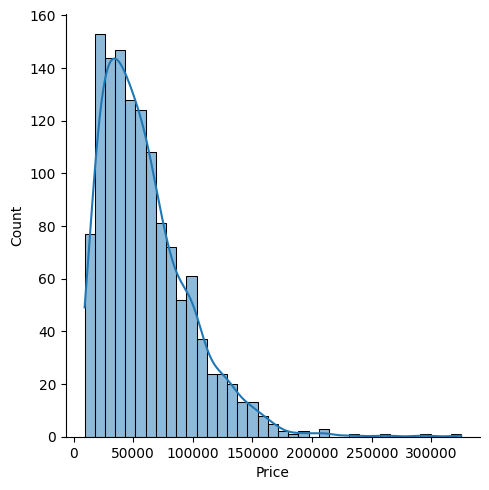

In [692]:
sns.displot(data = df, x = 'Price', kind = 'hist', kde = True)
plt.show()

<Axes: xlabel='Company'>

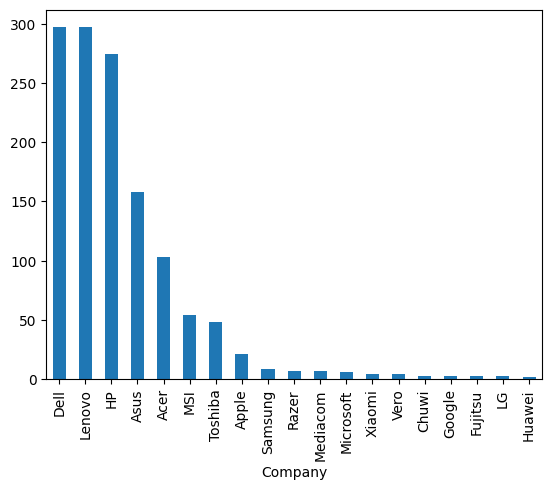

In [693]:
df['Company'].value_counts().plot(kind = 'bar')

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\1105716581.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Company'], y=df['Price'], palette = 'colorblind')


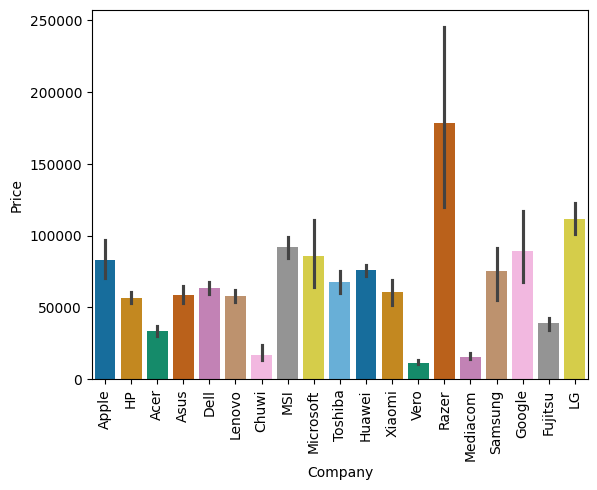

In [694]:
sns.barplot(x = df['Company'], y=df['Price'], palette = 'colorblind')
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

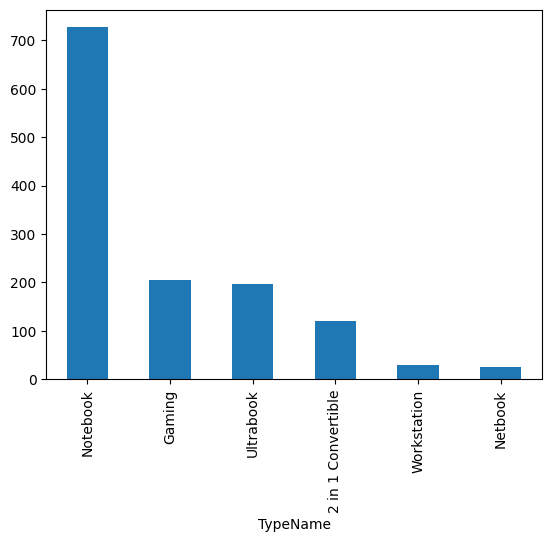

In [695]:
df['TypeName'].value_counts().plot(kind = 'bar')

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\4009029824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['TypeName'], y=df['Price'], palette = 'colorblind')


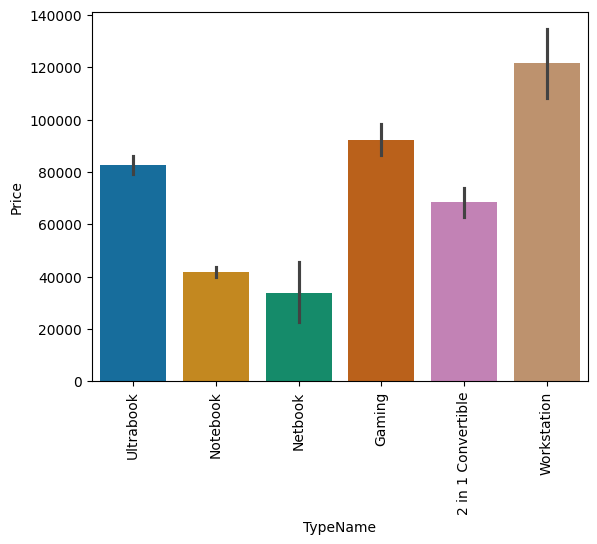

In [696]:
sns.barplot(x = df['TypeName'], y=df['Price'], palette = 'colorblind')
plt.xticks(rotation = 'vertical')
plt.show()

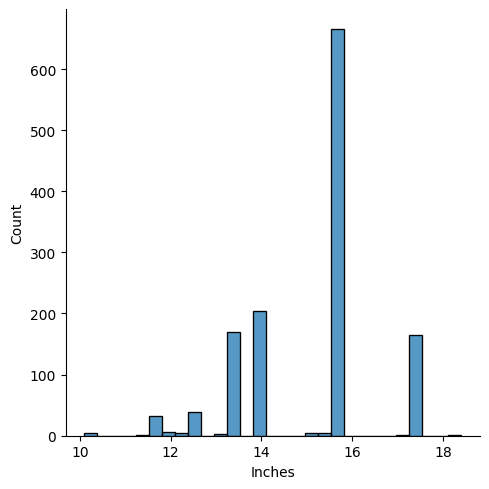

In [697]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

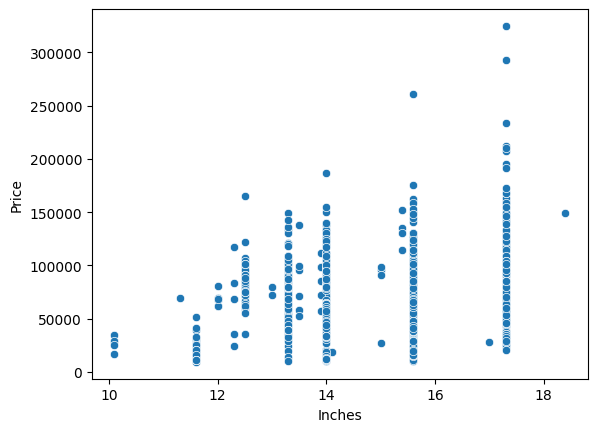

In [698]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [699]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0


<Axes: xlabel='Touchscreen'>

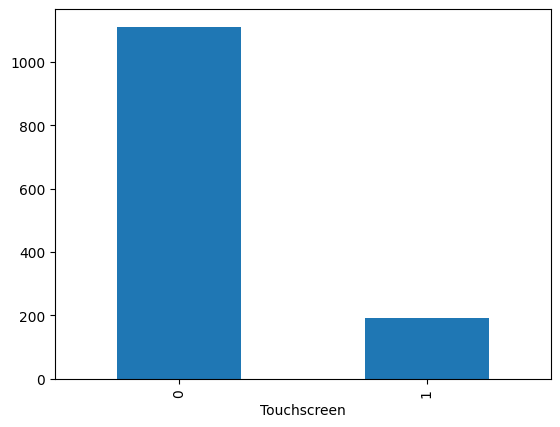

In [700]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

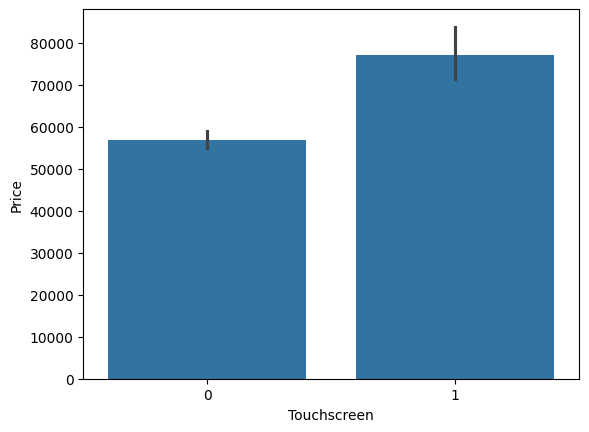

In [701]:
sns.barplot(x = df['Touchscreen'], y = df['Price'])

In [702]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0


In [703]:
new_col = df['ScreenResolution'].str.split('x', n = 1, expand = True)

In [704]:
df['X_res'] = new_col[0]
df['Y_res'] = new_col[1]

In [705]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
931,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.26,84129.1200,0,0,Full HD 1920,1080
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866.7200,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160
526,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,42570.7200,0,0,Full HD 1920,1080
1232,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24988.8528,1,0,Touchscreen 1366,768
914,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,26586.7200,0,0,Full HD 1920,1080


In [706]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [707]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')


In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [709]:
df['ppi'] = (df['X_res'] ** 2 + df['Y_res'] ** 2) ** 0.5 / df['Inches'].astype('float')

In [710]:
df.drop(columns=['ScreenResolution'], inplace = True)

In [711]:
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace = True)

In [712]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [713]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [714]:
df['cpu_name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [715]:
def fetch_processor(name):
    n = name.lower()
    if n in ('intel core i7', 'intel core i5', 'intel core i3'):
        return name
    elif n.split()[0] == 'intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'


In [716]:
df['cpu_brand'] = df['cpu_name'].apply(fetch_processor)

In [717]:
df.sample(15)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_name,cpu_brand
1190,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,43636.3200,0,1,141.211998,Intel Core i5,Intel Core i5
12,Apple,Ultrabook,Intel Core i7 2.8GHz,16,256GB SSD,AMD Radeon Pro 555,macOS,1.83,130001.6016,0,1,220.534624,Intel Core i7,Intel Core i7
209,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,31808.1600,0,0,100.454670,Intel Core i5,Intel Core i5
890,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.95,67399.2000,0,0,157.350512,Intel Core i5,Intel Core i5
607,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,30049.9200,0,0,141.211998,Intel Core i5,Intel Core i5
1202,Dell,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.00,68464.8000,1,0,141.211998,Intel Core i7,Intel Core i7
259,Lenovo,2 in 1 Convertible,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,90522.7200,1,1,141.211998,Intel Core i7,Intel Core i7
1195,HP,Notebook,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.5600,0,1,141.211998,Intel Core i7,Intel Core i7
1070,Dell,Notebook,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.06,25679.8944,0,0,100.454670,Intel Core i3,Intel Core i3
72,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,46353.6000,0,0,141.211998,Intel Core i7,Intel Core i7


<Axes: xlabel='cpu_brand'>

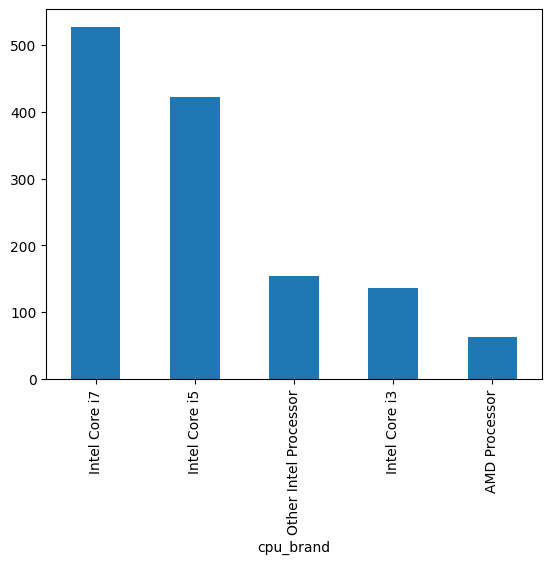

In [718]:
df['cpu_brand'].value_counts().plot(kind = 'bar')

In [719]:
df.drop(columns = ['Cpu', 'cpu_name'], inplace = True)

In [720]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

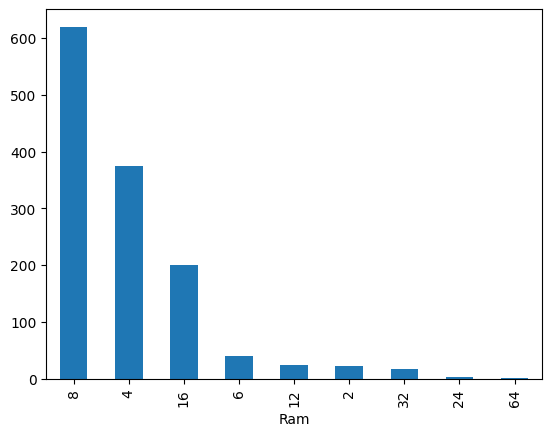

In [721]:
df['Ram'].value_counts().plot(kind = 'bar')

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\2328691097.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Ram'], y=df['Price'], palette = 'colorblind')


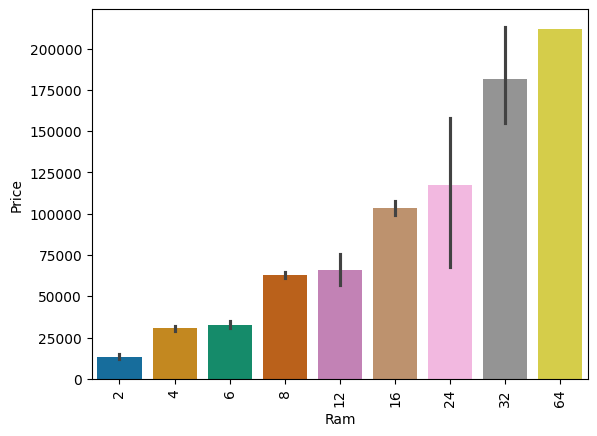

In [722]:
sns.barplot(x = df['Ram'], y=df['Price'], palette = 'colorblind')
plt.xticks(rotation = 'vertical')
plt.show()

In [723]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [724]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

new = df['Memory'].str.split('+', n = 1, expand = True)

df['first_mem'] = new[0].str.strip()
df['second_mem'] = new[1].str.strip()

df['1hdd'] = df['first_mem'].apply(lambda x: 1 if 'HDD' in x.upper() else 0)
df['1ssd'] = df['first_mem'].apply(lambda x: 1 if 'SSD' in x.upper() else 0)
df['1hyb'] = df['first_mem'].apply(lambda x: 1 if 'HYBRID' in x.upper() else 0)
df['1flash'] = df['first_mem'].apply(lambda x: 1 if 'FLASH STORAGE' in x.upper() else 0)

In [725]:
df['second_mem'].fillna('0', inplace = True)

df['2hdd'] = df['second_mem'].apply(lambda x: 1 if 'HDD' in x.upper() else 0)
df['2ssd'] = df['second_mem'].apply(lambda x: 1 if 'SSD' in x.upper() else 0)
df['2hyb'] = df['second_mem'].apply(lambda x: 1 if 'HYBRID' in x.upper() else 0)
df['2flash'] = df['second_mem'].apply(lambda x: 1 if 'FLASH STORAGE' in x.upper() else 0)

In [726]:
df['first_mem'] = df['first_mem'].str.replace(r'\D', '',regex = True)
df['second_mem'] = df['second_mem'].str.replace(r'\D', '',regex = True)

In [727]:
df['HDD'] = (df['first_mem'] * df['1hdd']) + (df['second_mem'] * df['2hdd'])
df['SSD'] = (df['first_mem'] * df['1ssd']) + (df['second_mem'] * df['2ssd'])
df['Hybrid'] = (df['first_mem'] * df['1hyb']) + (df['second_mem'] * df['2hyb'])
df['Flash_Storage'] = (df['first_mem'] * df['1flash']) + (df['second_mem'] * df['2flash'])

In [728]:
df['HDD'] = df['HDD'].apply(lambda x: 0 if x == '' else x)
df['SSD'] = df['SSD'].apply(lambda x: 0 if x == '' else x)
df['Hybrid'] = df['Hybrid'].apply(lambda x: 0 if x == '' else x)
df['Flash_Storage'] = df['Flash_Storage'].apply(lambda x: 0 if x == '' else x)

In [729]:
df.drop(columns=['first_mem', 'second_mem','1hdd','1ssd', '1hyb','1flash',
                 '2hdd','2ssd','2hyb','2flash'], inplace = True)

In [730]:
df.drop(columns=['Memory'], inplace = True)

In [731]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace = True)

In [732]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [733]:
df['gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [734]:
df['gpu_brand'].value_counts()

gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [735]:
df = df[df['gpu_brand'] != 'ARM']

In [736]:
df['gpu_brand'].value_counts()

gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\2862982999.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['gpu_brand'], y=df['Price'], palette = 'colorblind', estimator=np.median)


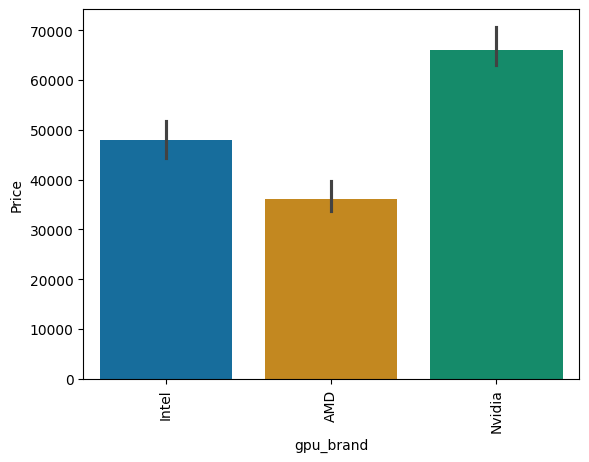

In [737]:
sns.barplot(x = df['gpu_brand'], y=df['Price'], palette = 'colorblind', estimator=np.median)
plt.xticks(rotation = 'vertical')
plt.show()

In [738]:
df.drop(columns=['Gpu'], inplace = True)

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\4134192724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'], inplace = True)


In [739]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [740]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\1097997373.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['OpSys'], y = df['Price'],palette = 'colorblind')


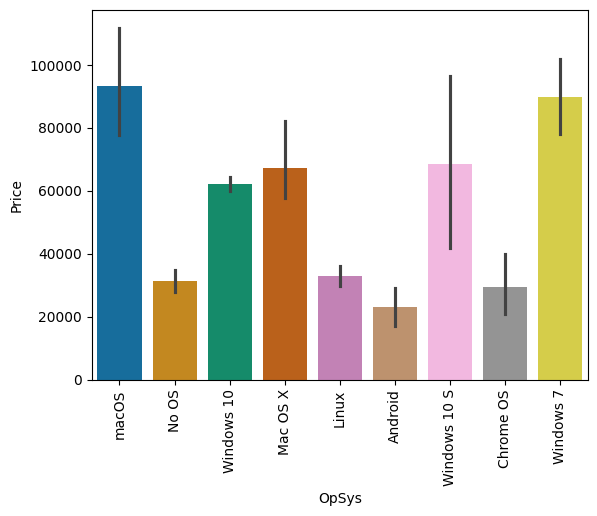

In [741]:
sns.barplot(x = df['OpSys'], y = df['Price'],palette = 'colorblind')
plt.xticks(rotation = 'vertical')
plt.show()

In [742]:
def car_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Max OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [743]:
df['os'] = df['OpSys'].apply(car_os)
df.drop(columns = ['OpSys'], inplace = True)


C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\4055857111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(car_os)
C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\4055857111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['OpSys'], inplace = True)


In [744]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


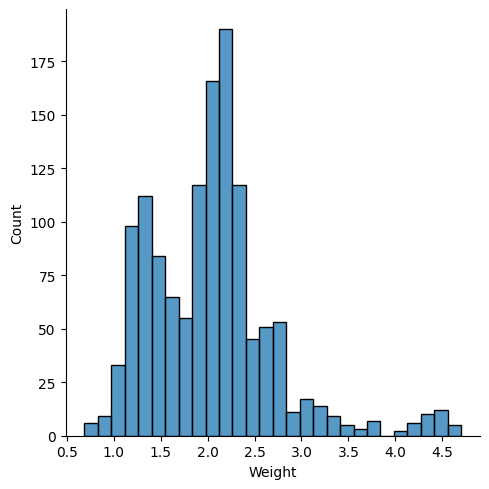

In [745]:
sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

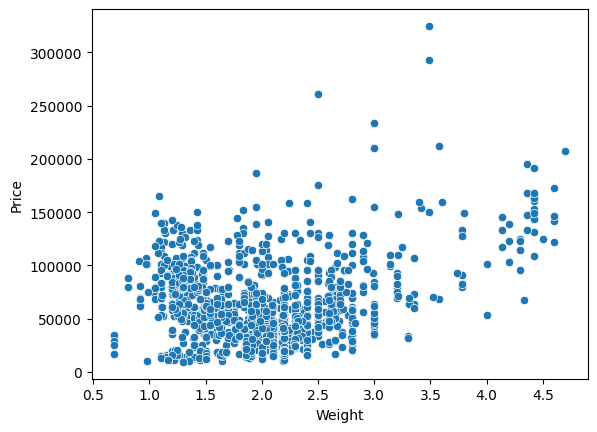

In [746]:
sns.scatterplot(x = df['Weight'], y = df['Price'])

In [747]:
df['HDD'] = df['HDD'].astype('int32')
df['SSD'] = df['SSD'].astype('int32')

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\1657149121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HDD'] = df['HDD'].astype('int32')
C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_17216\1657149121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SSD'] = df['SSD'].astype('int32')


In [748]:
df.select_dtypes(include='number').corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.020115
SSD            0.031256
Name: Price, dtype: float64

<Axes: >

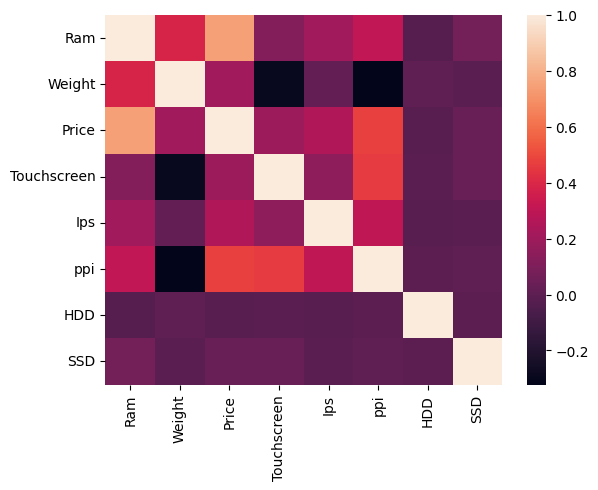

In [749]:
sns.heatmap(df.select_dtypes(include='number').corr())

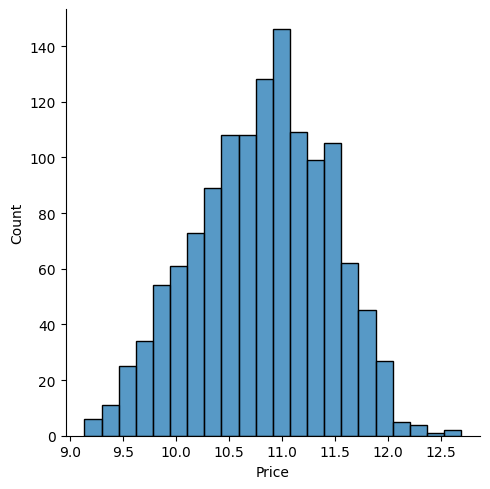

In [750]:
sns.displot(np.log(df['Price']))

In [751]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [752]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 2)


In [753]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [754]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from xgboost import XGBRegressor

In [755]:
df.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux


## Linear Regression

In [756]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8014271350340171
MAE 0.21743865646688468


## Ridge Regression

In [757]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Ridge(alpha=7)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.805620405476852
MAE 0.21565970597482742


In [758]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Lasso(alpha= 0.0001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8022428147837033
MAE 0.21712085430850456


## KNN

In [759]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8050071327763206
MAE 0.19279726182456872


## Decision Tree

In [760]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8479993563346778
MAE 0.1789956408178737


## Random Forest

In [761]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8847949213372988
MAE 0.16012183497865992


## AdaBoost

In [762]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=25, learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.7986898813375263
MAE 0.2281663920203191


## XGBoost

In [763]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,7,10,11])
# ], remainder='passthrough')

# step2 = XGBRegressor(n_estimators=45, max_depth = 5, learning_rate = 0.1)

# pipe = Pipeline([
#     ('step1', step1),
#     ('step2', step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score', r2_score(y_test, y_pred))
# print('MAE', mean_absolute_error(y_test, y_pred))

## Voting Regressor

In [764]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')


# rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
# gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)

# step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[5,1,1])

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

## Stacking Regressor

In [765]:
# from sklearn.ensemble import StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# estimators = [
# ('rf',RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
# ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
# ('xgb',XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))]

# step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha= 100))

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

### Exporting the model

In [766]:
import pickle
import json

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [767]:
X_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
